# Author : Jincy Jacob

## TASK 2 : Prediction using unsupervised Machine Learning

#### In this k-means clustering task I tried to predict the optimum number of clusters and represent it visually

In [1]:
# Import required packages

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

### STEP 1 - Loading the dataset

In [2]:
iris = pd.read_csv("C:\\Users\\Jincy Jacob\\Downloads\\Iris.csv")
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


##### The data is supervised and we make it unsupervised

In [4]:
x =iris[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
x.head

<bound method NDFrame.head of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]>

In [5]:
x = iris[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].values
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

### STEP 2 - Finding  number of cluster using Elbow method

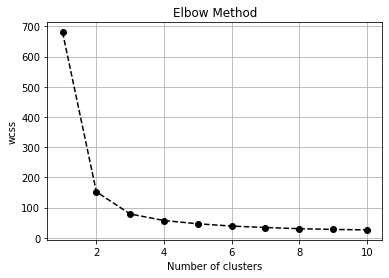

In [6]:
wcss = []
clust_range= range(1,11)
for k in clust_range:
    kmeans = KMeans(n_clusters = k)
    kmeans = kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
    
plt.plot(clust_range,wcss,'go--', color='black')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss") #Within cluster sum of squares
plt.grid()
plt.show()


#### From  above wee have seen that number of clusters is 3

### STEP 3 - Applying k-means to the dataset

In [7]:
kmeans = KMeans(n_clusters=3)

In [8]:
kmeans.fit(x)

KMeans(n_clusters=3)

In [9]:
y=kmeans.predict(x)

### Step - 4 Plotting the graph

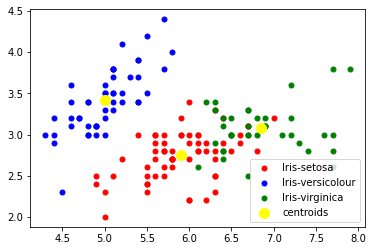

In [10]:
plt.scatter(x[y == 0,0],x[y == 0,1],s = 25,c='red',label='Iris-setosa')
plt.scatter(x[y == 1,0],x[y == 1,1],s = 25,c = 'blue',label ='Iris-versicolour')
plt.scatter(x[y == 2,0],x[y == 2,1],s = 25,c = 'green',label ='Iris-virginica')

# Plotting centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s = 100,c ='yellow',label ='centroids')
plt.legend()
plt.show()

## Conclusion

#### I was able to carry-out prediction using unsupervised ML task.

# Thank you